[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/cohmathonc/BIOSCI544/blob/master/BIOSCI544_logistic-map2.ipynb)

# Logistic Map

In [0]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import TextBox 
from scipy.signal import periodogram 


$x_{n+1}=r(x_n)(1-x_n)$

In [0]:
def update_x(x_previous, r):
  x_next = r * x_previous * (1.0-x_previous)
  return x_next

def eval_n(r, x0=0.1, n_max=100):
  x = np.zeros(n_max)
  x[0] = x0
  for n in range(1,n_max):
    x[n] = update_x(x[n-1],r)
  return x   

In [0]:
r_steps = 500
r_range_min = 2.9
r_range_max = 4
n_max   = 1000

rs = np.linspace(2.9, 4, r_steps)
x  = np.zeros((r_steps, n_max))

for i, r in enumerate(rs):
  x[i,:] = eval_n(r, x0=0.1, n_max=n_max)
  


In [0]:
def cobweb_plot(r,nstep):
     x=np.linspace(0,1,100)
     fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,10))
     ax2.plot(x,r*x*(1-x))
     ax2.plot(x,x)
     X=np.linspace(0,1,10)[1:]
     mycolors=['b','g','r','c','m','y','k','w']
     if nstep>0:
        Y=logisticIter(r,0,nstep,0.1)  
        plt.vlines(Y[0],0,Y[1])
        k=0
        ax1.plot(Y)
        for i in range(1,len(Y)-1):
           
          c=mycolors[k]
          
          ax2.hlines(Y[i],Y[i-1],Y[i],color=c)
          ax2.vlines(Y[i],Y[i],Y[i+1],color=c)
          
          
          if i%2==0:
            k=k+1
            if k>=len(mycolors):
              k=0
         



In [0]:
interact(cobweb_plot,r=widgets.FloatText(value=2,step=0.1),nstep=widgets.IntText(value=0,step=1));

interactive(children=(FloatText(value=2.0, description='r', step=0.1), IntText(value=0, description='nstep'), …

In [0]:
logistic =lambda r,p: r*p*(1-p)
def logisticIter(r,tmin,tmax,p=0.1):
     x=[p]
     for t in range(tmax):
          p=logistic(r,p)
          x.append(p)
     return x[tmin:]


In [0]:


def plot_logistic(r):
  s = logisticIter(r,0,100,p=0.1)
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))

  ax1.plot(s,lw=2)
  ax1.set_xlabel('time')
  ax1.set_ylabel('X',size=20)
  ax1.set_xlim(0,100)
  ax1.set_ylim(0,1)
  s=logisticIter(r,0,16000,p=0.1)[1400:];
  freq,P=periodogram(s);
  freq=freq[1:];P=np.log(P[1:]);
  ax2.plot(1/freq,P)
  ax2.set_ylim(-20,0)
  ax2.set_xlim(0,18)
  ax2.set_ylabel(r"$log(PSD)$")
  ax2.set_xlabel(r"$period$")



In [0]:
interact(plot_logistic,r=widgets.FloatText(value=1,step=0.005));


interactive(children=(FloatText(value=1.0, description='r', step=0.005), Output()), _dom_classes=('widget-inte…

In [0]:
rvalues=[0.8,1,3,3.82842712,3.44948974,3.73817237,3.62655316,3.70164076,3.54409035,3.56440726]
interact(plot_logistic,r=widgets.Dropdown(options=rvalues,value=1));


interactive(children=(Dropdown(description='r', index=1, options=(0.8, 1, 3, 3.82842712, 3.44948974, 3.7381723…

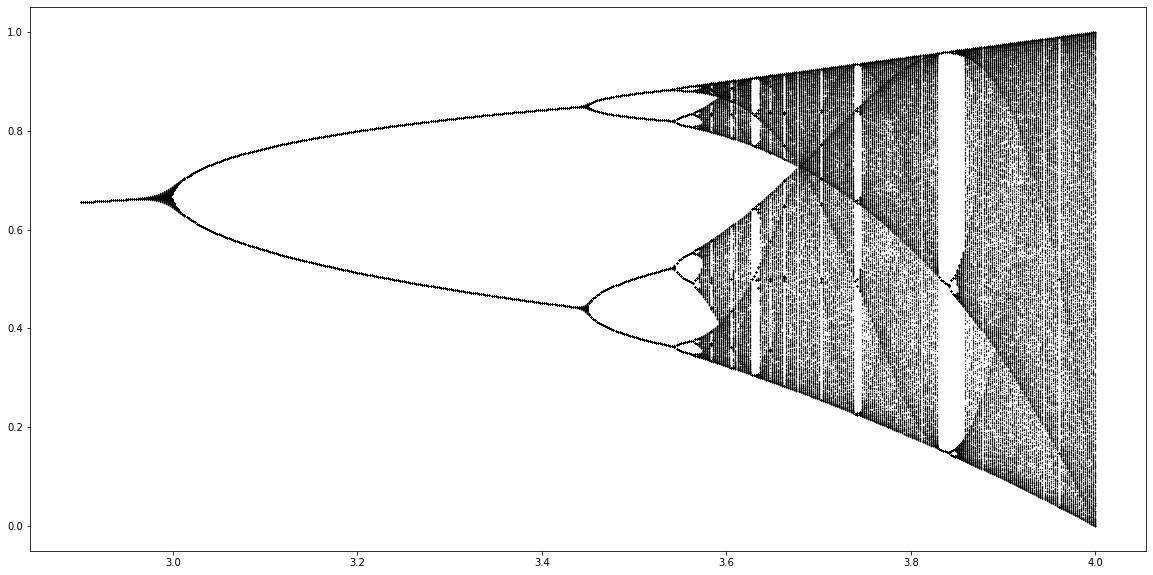

In [0]:
# 100 iterations discharged to allow solution to stabilize

plt.figure(figsize=(20,10))
plt.plot(rs, x[:, 100:], '.k', markersize=0.5)
plt.show()